### Statistic of the generated altimeter-srtm difference data.
#### This script is similar to the scritps/stat_dif_altimeter.py


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from utils.geotif_io import readTiff


In [25]:
bottom, left = 30, 93
### 1. ele_dif data
tile_name = 'tile_'+str(bottom)+'_'+str(left)
dir_data = 'data/icesat-1/GLAH14-2008/tiles'
# dir_data = 'data/icesat-2/ATL06-2019/tiles'
path_data = dir_data + '/' + tile_name + '_srtm_dif.h5'
### 2. srtm data
path_srtm = 'data/dem-data/srtm-c/tiles/'+tile_name+'.tif'
### 3. glacier mask
path_gla_mask = 'data/rgi60/tiles/'+tile_name+'.tif'



In [26]:
!h5ls $path_data


h                        Dataset {939}
h_dif                    Dataset {939}
h_srtm                   Dataset {939}
lat                      Dataset {939}
lon                      Dataset {939}
t_dyr                    Dataset {939}
type_fp                  Dataset {939}


In [27]:
keys=['lon', 'lat', 'h', 'h_srtm', 't_dyr', 'h_dif', 'type_fp']
elev_dif = {}
with h5py.File(path_data, 'r') as f_dif:
    for key in keys:
        elev_dif[key] = f_dif[key][:]
print(elev_dif['lon'].shape)


(939,)


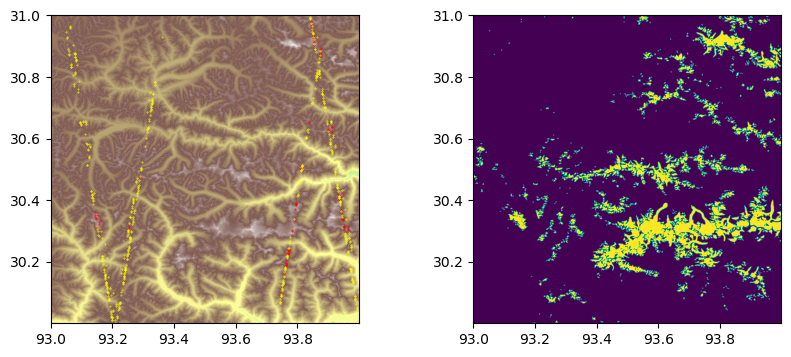

In [28]:
idx_glacier = np.argwhere(elev_dif['type_fp']==3).flatten()
idx_stable = np.argwhere(elev_dif['type_fp']==0).flatten()
srtm, srtm_info = readTiff(path_srtm)
gla_mask, gla_info = readTiff(path_gla_mask)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(srtm, vmin=0, vmax=7000, extent=srtm_info['geoextent'], cmap='terrain')
plt.scatter(x=elev_dif['lon'][idx_glacier], y=elev_dif['lat'][idx_glacier], marker='.',c='red', s=0.5, zorder=0)
plt.scatter(x=elev_dif['lon'][idx_stable], y=elev_dif['lat'][idx_stable], marker='.',c='yellow', s=0.5, zorder=0)
plt.subplot(1,2,2)
plt.imshow(gla_mask, vmin=0, vmax=1, extent=gla_info['geoextent'])



### Note: type_fp -> stable (0), water (1), forest(2), glacier (3)

In [29]:
###  Statistic of the glacier area
h_dif = elev_dif['h_dif']
h_glacier_dif = h_dif[idx_glacier]
h_glacier_dif[np.abs(h_glacier_dif)>150]=np.nan     ### Remove the outlier altimeter_srtm difference data.
h_glacier_dif_filter = h_glacier_dif[~np.isnan(h_glacier_dif)]
h_glacier_dif_mean = np.mean(h_glacier_dif_filter)
h_glacier_dif_sigma = np.std(h_glacier_dif_filter)
print('number of valid values:', len(h_glacier_dif_filter))
print('mean:', h_glacier_dif_mean)
print('standard deviation:', h_glacier_dif_sigma)


number of valid values: 50
mean: 1.5541114
standard deviation: 24.85453


In [30]:
###  Statistic of the stable area (exclude the water and forest land type)
h_dif = elev_dif['h_dif']
h_stable_dif = h_dif[idx_stable]
h_stable_dif[np.abs(h_stable_dif)>150]=np.nan     ### Remove the outlier altimeter_srtm difference data.
h_stable_dif_filter = h_stable_dif[~np.isnan(h_stable_dif)]
h_stable_dif_mean = np.mean(h_stable_dif_filter)
h_stable_dif_sigma = np.std(h_stable_dif_filter)
print('number of valid values:', len(h_stable_dif_filter))
print('mean:', h_stable_dif_mean)
print('standard deviation:', h_stable_dif_sigma)


number of valid values: 403
mean: 1.3509694
standard deviation: 21.659098


Text(0.5, 0, 'Elevation change on the glacier region')

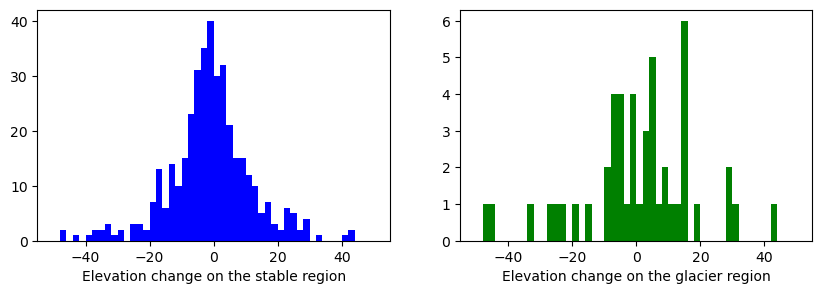

In [31]:
### Histogram for the glacier and stable regions, respectively.
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
n, bins, patches = plt.hist(h_stable_dif_filter, bins=50, range=(-50,50), color='blue')
plt.xlabel('Elevation change on the stable region')
plt.subplot(1,2,2)
n, bins, patches = plt.hist(h_glacier_dif_filter, bins=50, range=(-50,50), color='green')
plt.xlabel('Elevation change on the glacier region')

